#### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import six
import pandas as pd
import numpy as np
from skeleton.utils import pystr


#### Load datasets 

In [2]:
boston = (
    pd.read_csv("../datasets/boston_housing.csv")
    .assign(
        total_sqm = lambda df: (df["1stFlrSF"] + df["2ndFlrSF"])*0.093,
        ppsqm = lambda df: df.SalePrice /   df.total_sqm 
        )
    
)
pystr(boston)

Pandas DataFrame 1460 obs. of 83 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ MSSubClass        : int64        60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20, 20, 45, 20, 90, 20...
$ MSZoning          : str          "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "RL", "RL", "RL", "RL...
$ LotFrontage       : float64      65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 85.0, nan,...
$ LotArea           : int64        8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 119...
$ Street            : str          "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pa...
$ Alley             : str          "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan"...
$ LotShape          : str          "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", "Reg", "Reg", "Reg"...
$ LandContour       : str          "Lvl", "Lv

#### Plots

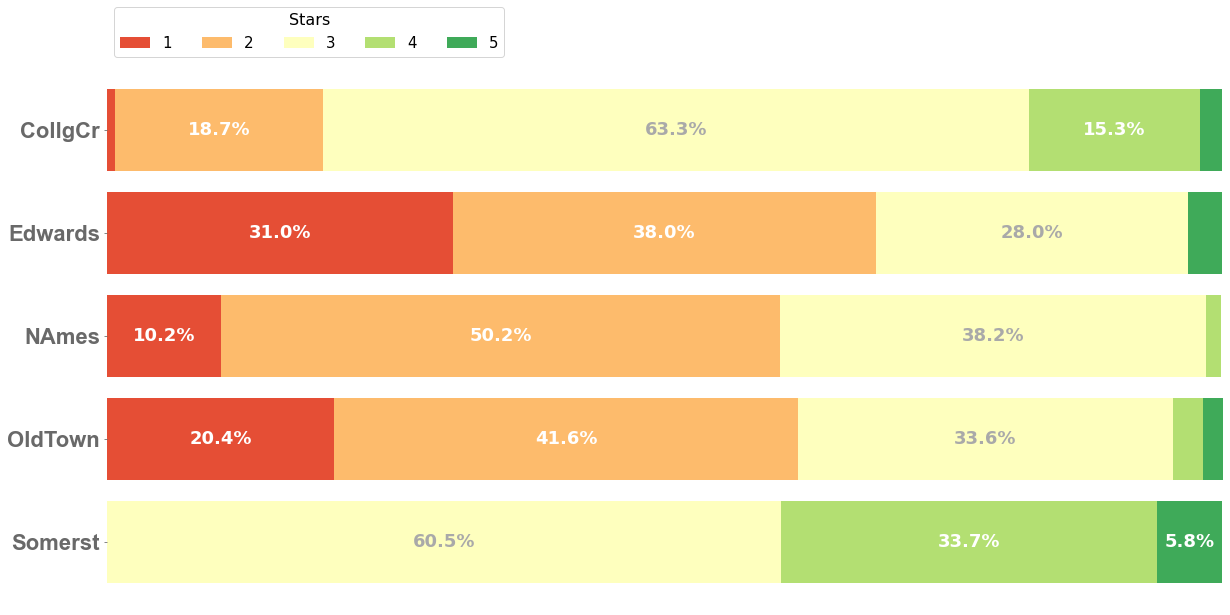

In [5]:
from skeleton.plots.barplots import plot_percentage_per_subcategory

primary='Neighborhood'
secondary='Stars'
 
popular_neighborhoods = boston.groupby('Neighborhood').Id.count() #.index
popular_neighborhoods = popular_neighborhoods[popular_neighborhoods > 80].index

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]
    .assign(Stars = lambda df: df.OverallQual.replace({2:1,3:1,4:1,5:2,6:3,7:3,8:4,9:5,10:5}))
    
) 

    
plot_percentage_per_subcategory(df,primary,secondary);

In [4]:
from skeleton.plots.scatter import plot

popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 



Possible categories to .focus_on() ['CollgCr', 'Edwards', 'Gilbert', 'OldTown', 'Somerst']


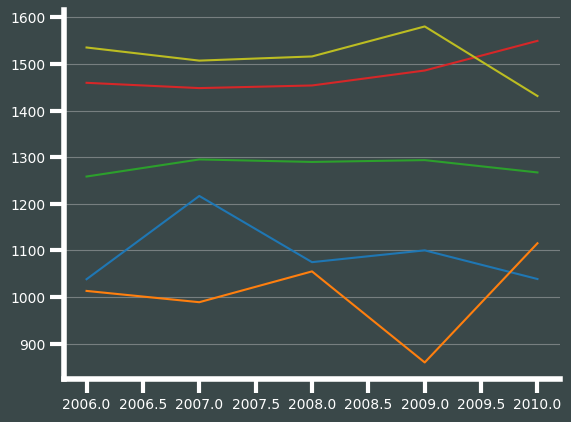

In [17]:
(
    plot(df,"YrSold","ppsqm")
    .set_style("vox")
    .color_by("Neighborhood")
    .show()
)

In [41]:
boston.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [42]:
popular_neighborhoods

Neighborhood
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Name: Id, dtype: int64

In [ ]:
cut_points = [15,25,35,45,55,65,75,85,95,105,115,125,135,145]
labels = [20,30,40,50,60,70,80,90,100,110,120,130,140]
pd.cut(pesos.promedio,bins=cut_points,labels=labels,include_lowest=True)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive